**06-01 머신러닝 용어 이해하기**

**06-02 퍼셉트론**

In [2]:
def OR_gate(x1,x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 +b
    if result <= 0:
        return 0
    else:
        return 1

In [3]:
OR_gate(1,1)

1

In [7]:
def NAND_gate(x1,x2):
    w1=-0.5
    w2=-0.5
    b= 0.7
    result = x1*w1 + x2*w2 +b
    if result <= 0:
        return 0
    else:
        return 1

In [8]:
def XOR_gate(x1,x2):
    a = NAND_gate(x1,x2) + OR_gate(x1,x2)
    if a == 2:
        return 1
    else:
        return 0

In [9]:
XOR_gate(1,1), XOR_gate(0,1), XOR_gate(1,0), XOR_gate(0,0)

(0, 1, 1, 0)

**06-03 XOR 문제 - 단층 퍼셉트론 구현하기**

In [10]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2,1, bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(1001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7273973822593689
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996


In [12]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


**06-05 XOR 문제 - 다층 퍼셉트론 구현하기**

In [1]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
    nn.Linear(2,10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias = True),
    nn.Sigmoid(),
    nn.Linear(10,1, bias = True),
    nn.Sigmoid()
).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

In [3]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ',hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ',predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1168801e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8529482e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


**06-06 비선형 활성화 함수**   
시그모이드 지양 / 은닉층의 렐루(Relu) 함수

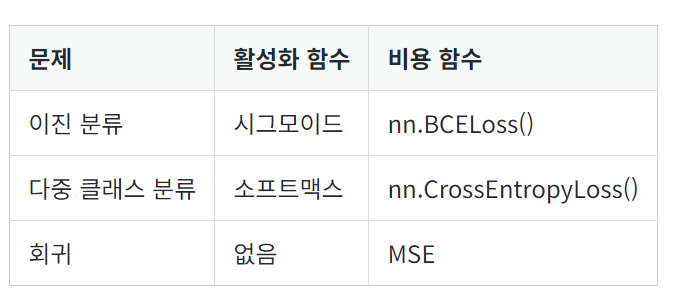

**06-07 다층 퍼셉트론으로 손글씨 분류하기**

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
print(digits.target[0])

0


In [7]:
print('전체 샘플의 수:{}'.format(len(digits.images)))

전체 샘플의 수:1797


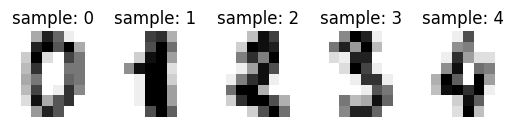

In [8]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('sample: %i' % label)

In [9]:
X = digits.data
Y = digits.target

import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [10]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    losses.append(loss.item())

Epoch    0/100 Cost: 2.381846
Epoch   10/100 Cost: 2.086940
Epoch   20/100 Cost: 1.844468
Epoch   30/100 Cost: 1.555474
Epoch   40/100 Cost: 1.246410
Epoch   50/100 Cost: 0.968091
Epoch   60/100 Cost: 0.724376
Epoch   70/100 Cost: 0.519714
Epoch   80/100 Cost: 0.380597
Epoch   90/100 Cost: 0.293385


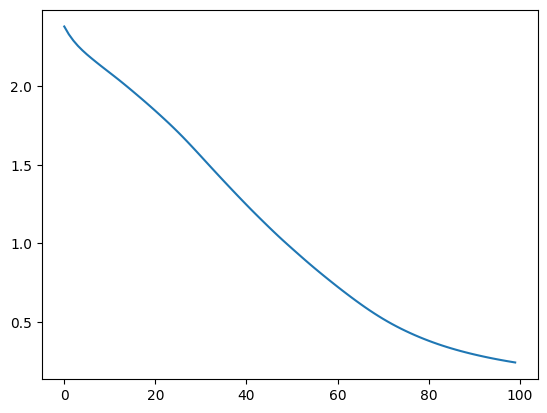

In [11]:
plt.plot(losses)

**06-08 다층 퍼셉트론으로 MNIST 분류하기**

In [ ]:
#데이터 로드
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version =1, cache = True, as_frame = False)
mnist.data[0]

In [14]:
mnist.target[0]

'5'

In [15]:
mnist.target = mnist.target.astype(np.int8)

In [16]:
X = mnist.data / 255
y = mnist.target

In [ ]:
X[0]

이 이미지 데이터의 레이블은 5이다


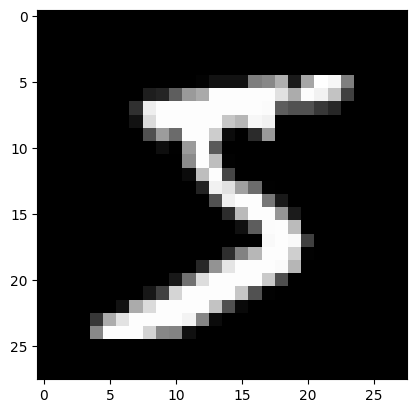

In [18]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [24]:
#데이터 분리
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/7, random_state = 0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size = 64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = False)


In [29]:
#다층 퍼셉트론
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 100))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
)


In [38]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.01)

def train(epoch):
    model.train()

    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        targets = targets.long()
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

    print("epoch{}:완료\n".format(epoch))

In [39]:
def test():
    model.eval()
    correct = 0

    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data,1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()

    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(
        correct, data_num, 100. * correct / data_num
    ))

In [40]:
test()


테스트 데이터에서 예측 정확도: 199/10000 (2%)



In [41]:
for epoch in range(3):
    train(epoch)

test()

epoch0:완료

epoch1:완료

epoch2:완료


테스트 데이터에서 예측 정확도: 9569/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


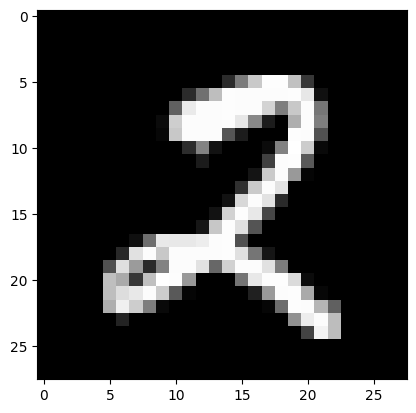

In [43]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

**06-09 과적합**

68.53510546084946
